In [1]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from dotenv import load_dotenv
import os
load_dotenv()

True

In [2]:
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

In [3]:
class MyState(TypedDict):
  input:str
  output:str
  step:int
  complete:bool

In [4]:
def planner(state: MyState) -> MyState:
    print("Planning...")
    state["output"] = f"Plan for {state['input']}"
    return state

In [5]:
def executor(state: MyState) -> MyState:
    print("Executing...")
    state["output"] += " → Executed"
    return state

In [6]:
def evaluator(state: MyState) -> MyState:
    print("Evaluating...")
    step = state["step"] + 1
    complete = step >= 3
    state["step"] = step
    state["complete"] = complete
    return state

In [7]:
def check_completion(state: MyState):
    return "planner" if not state["complete"] else "complete"

In [8]:
graph = StateGraph(MyState)
graph.add_node("planner", planner)
graph.add_node("executor", executor)
graph.add_node("evaluator", evaluator)

graph.set_entry_point("planner")
graph.add_edge("planner", "executor")
graph.add_edge("executor", "evaluator")

graph.add_conditional_edges("evaluator", check_completion, {
    "planner": "planner",
    "complete": "__end__"
})
app = graph.compile()



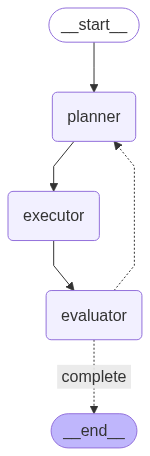

In [9]:
from IPython.display import display,Image
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:

initial_state = {
    "input": "Build a LangGraph loop",
    "output": "",
    "step": 0,
    "complete": False,
}
final_state = app.invoke(initial_state)
print("\nFinal State:", final_state)


Planning...
Executing...
Evaluating...
Planning...
Executing...
Evaluating...
Planning...
Executing...
Evaluating...

Final State: {'input': 'Build a LangGraph loop', 'output': 'Plan for Build a LangGraph loop → Executed', 'step': 3, 'complete': True}
